In [1]:
import os
os.chdir('../')
os.getcwd()

'/home/gianni/Files/Studium/Master/04_FS2023/MT/f1tenth_development_gym'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

In [3]:
def angle(vector1, vector2):
    x1, y1 = vector1
    x2, y2 = vector2
    inner_product = x1*x2 + y1*y2
    len1 = math.hypot(x1, y1)
    len2 = math.hypot(x2, y2)
    return math.acos(inner_product/(len1*len2))

-110


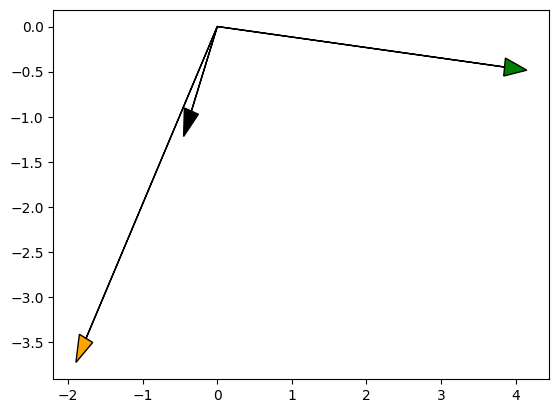

Angle between car and vel: 0.11602884636671124
Slip angle: -0.09229302
Angle of car pose: 0.11602890486832998


In [4]:
path = 'SI_Toolkit_ASF/Experiments/0_DNN_tiv/Recordings_preprocessed/Train/Trajectory-0.csv'
df = pd.read_csv(path, skiprows=8, usecols=['time', 'D_pose_x', 'D_pose_y', 'D_car_pose_x', 'D_car_pose_y', 'pose_theta', 'slip_angle'])
pt = df.iloc[35]
print(int(np.rad2deg(pt.pose_theta)))
fig, ax = plt.subplots()
ax.arrow(0.0, 0.0, pt.D_pose_x, pt.D_pose_y,head_width=0.2, fc='orange')
ax.arrow(0.0, 0.0, pt.D_car_pose_x, pt.D_car_pose_y, head_width=0.2, fc='green')
# ax.add_patch(matplotlib.patches.Rectangle((0.0, 0.0), 0.1, 0.3, angle=pt.pose_theta))
len = 1.0
ax.arrow(0.0, 0.0, len * np.cos(pt.pose_theta),  len * np.sin(pt.pose_theta), head_width=0.2, fc='black')
plt.show()
print('Angle between car and vel:', angle((pt.D_pose_x, pt.D_pose_y), (np.cos(pt.pose_theta), np.sin(pt.pose_theta))))
print('Slip angle:', pt.slip_angle)
print('Angle of car pose:', angle((pt.D_car_pose_x, pt.D_car_pose_y), (1.0, 0.0)))

In [5]:
df[df.D_car_pose_y > 5.0]

,time,pose_theta,slip_angle,D_pose_x,D_pose_y,D_car_pose_x,D_car_pose_y


In [6]:
np.rad2deg(0.6)

34.37746770784939

In [8]:
df.describe()

,time,pose_theta,slip_angle,D_pose_x,D_pose_y,D_car_pose_x,D_car_pose_y
count,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000
mean,178.491048,-0.069588,-0.005794,0.382775,-0.227207,4.920891,-0.051485
std,119.664977,1.769474,0.142981,3.968120,3.704234,2.092006,1.031447
min,1.480000,-3.140834,-0.760863,-8.769321,-9.292221,0.665546,-3.869223
25%,75.210000,-1.523555,-0.054595,-2.495748,-2.948761,3.290814,-0.334019
50%,165.660000,-0.149867,0.000254,0.589752,-0.360048,4.854804,-0.003636
75%,283.230000,1.394142,0.050329,3.324967,2.473140,6.422641,0.287620
max,398.320000,3.136441,0.562624,9.604263,9.565878,9.584216,3.999144


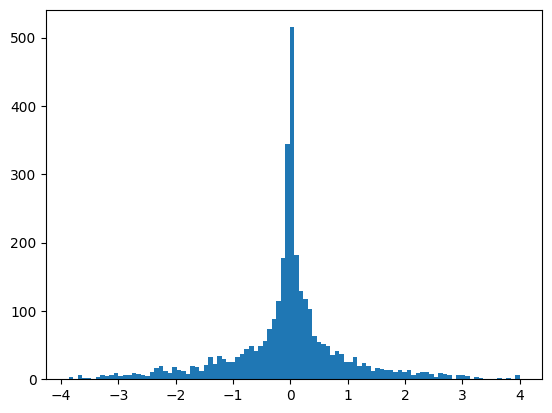

In [7]:
plt.hist(df.D_car_pose_y, bins=100);